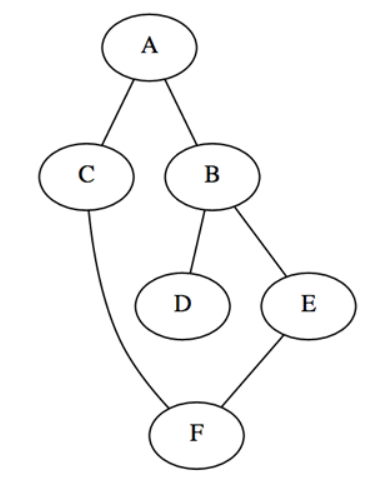 

In [1]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [17]:
def dfs(graph, start):
    """Using iterative implementation and Stack data structure"""
    visited, stack = set(), [start]
    order_visited = []
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            print('Nodes visited: ' + str(visited))
            stack.extend(graph[vertex] - visited)
        order_visited.append(str(vertex))
    print('\n')
    print("Order visited: " + str(order_visited))
    return visited

dfs(graph, 'A')

Nodes visited: {'A'}
Nodes visited: {'A', 'C'}
Nodes visited: {'F', 'A', 'C'}
Nodes visited: {'E', 'F', 'A', 'C'}
Nodes visited: {'C', 'A', 'E', 'B', 'F'}
Nodes visited: {'D', 'C', 'A', 'E', 'B', 'F'}


Order visited: ['A', 'C', 'F', 'E', 'B', 'D', 'B']


{'A', 'B', 'C', 'D', 'E', 'F'}

In [35]:
def dfs(graph, start, visited=None):
    """Recursive implementation"""
    if visited is None:
        visited = set()
    visited.add(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

dfs(graph, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [36]:
def dfs_paths(graph, start, goal):
    """return all possible paths between a starting and ending node"""
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

list(dfs_paths(graph, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

In [37]:
def dfs_paths(graph, start, goal, path=None):
    """recursive implementation of possible paths"""
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in graph[start] - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

list(dfs_paths(graph, 'A', 'F'))

[['A', 'B', 'E', 'F'], ['A', 'C', 'F']]